In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import json 

# load preped deep5 data

In [37]:
pickle_file = '/root/trading_systems/kucoin_dir/analysing_data/df_deep5_preped.pkl'
df_deep5 = pd.read_pickle(pickle_file)
df_deep5



,timestamp,best_ask,best_bid,mean_price,weighted_avg_ask_price,weighted_avg_bid_price,imbalance
0,2024-12-08 11:40:00.545,2.54541,2.54540,2.545405,2.546273,2.545377,-0.410726
1,2024-12-08 11:40:00.640,2.54595,2.54594,2.545945,2.546560,2.545861,-0.148564
2,2024-12-08 11:40:00.745,2.54631,2.54605,2.546180,2.546385,2.545984,-0.236727
3,2024-12-08 11:40:00.855,2.54606,2.54605,2.546055,2.546317,2.545839,0.394562
4,2024-12-08 11:40:00.958,2.54615,2.54614,2.546145,2.546236,2.546113,-0.021551
...,...,...,...,...,...,...,...
32595,2024-12-08 12:40:22.545,2.56000,2.55998,2.559990,2.560195,2.559769,-0.185042
32596,2024-12-08 12:40:22.732,2.56000,2.55998,2.559990,2.560195,2.559769,-0.185042
32597,2024-12-08 12:40:23.050,2.56000,2.55998,2.559990,2.560115,2.559720,0.345011
32598,2024-12-08 12:40:23.153,2.56000,2.55981,2.559905,2.560071,2.559724,0.140983


# load preped match data

In [38]:
path_to_match = 'df_match_preped.pkl'
df_match = pd.read_pickle(path_to_match)
df_match

,timestamp,price,side,size
0,2024-12-08 11:40:00.524,2.54541,buy,328.2866
1,2024-12-08 11:40:01.667,2.54626,sell,21.7891
2,2024-12-08 11:40:05.186,2.54743,buy,3.2935
3,2024-12-08 11:40:06.023,2.54779,buy,0.1971
4,2024-12-08 11:40:06.169,2.54797,sell,20.3782
...,...,...,...,...
8095,2024-12-08 12:40:02.797,2.56072,sell,175.5000
8096,2024-12-08 12:40:02.797,2.56071,sell,171.7576
8097,2024-12-08 12:40:03.247,2.56048,sell,194.9394
8098,2024-12-08 12:40:04.566,2.56025,sell,144.6600


# merge deep5 and match data 

In [43]:
df_merged = pd.merge_asof(df_match, df_deep5, on='timestamp', direction='backward')
df_merged.head(50)

,timestamp,price,side,size,best_ask,best_bid,mean_price,weighted_avg_ask_price,weighted_avg_bid_price,imbalance
0,2024-12-08 11:40:00.524,2.54541,buy,328.2866,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-12-08 11:40:01.667,2.54626,sell,21.7891,2.54627,2.54626,2.546265,2.546361,2.545925,-0.101133
2,2024-12-08 11:40:05.186,2.54743,buy,3.2935,2.54743,2.54742,2.547425,2.547727,2.547389,0.619771
3,2024-12-08 11:40:06.023,2.54779,buy,0.1971,2.54779,2.54778,2.547785,2.548053,2.547698,0.471475
4,2024-12-08 11:40:06.169,2.54797,sell,20.3782,2.54798,2.54797,2.547975,2.548748,2.547922,-0.299877
5,2024-12-08 11:40:06.169,2.54797,sell,585.0000,2.54798,2.54797,2.547975,2.548748,2.547922,-0.299877
6,2024-12-08 11:40:06.169,2.54797,sell,39.2152,2.54798,2.54797,2.547975,2.548748,2.547922,-0.299877
7,2024-12-08 11:40:06.169,2.54793,sell,284.8000,2.54798,2.54797,2.547975,2.548748,2.547922,-0.299877
8,2024-12-08 11:40:06.170,2.54779,sell,57.9325,2.54798,2.54797,2.547975,2.548748,2.547922,-0.299877
9,2024-12-08 11:40:06.170,2.54769,sell,3.9356,2.54798,2.54797,2.547975,2.548748,2.547922,-0.299877


In [157]:
interval_seconds =interval_seconds

def aggregate_imbalance(df, interval_seconds=1):    
    # copy to prevent altering original df
    df_copy =df.copy()

    print(df_copy.columns)
    df_copy.set_index('timestamp', inplace=True)

    # Resample the DataFrame to the specified time interval (e.g., 10 seconds)
    resampled_df = df_copy.resample(f'{interval_seconds}s',label='right',closed='right').agg({
        'imbalance': 'mean'
    })
    resampled_df= resampled_df.reset_index()

    df_copy.drop(['imbalance'], inplace=True, axis=1)
    # merge resampled_df with original df to get aggregated imbalance 
    df_deep5_interval = pd.merge_asof(resampled_df, df_copy, on='timestamp', direction='backward')
    return df_deep5_interval


df_deep5_interval = aggregate_imbalance(df_deep5,interval_seconds)


Index(['timestamp', 'best_ask', 'best_bid', 'mean_price',
       'weighted_avg_ask_price', 'weighted_avg_bid_price', 'imbalance'],
      dtype='object')


In [158]:
df_final = pd.merge(df_match_agg, df_deep5_interval, on='timestamp', how='outer')
df_final['total_imbalance'] =  df_final['imbalance'] 
df_final

,timestamp,trade_buy,trade_sell,buy_volume,sell_volume,avg_match_buy_price,avg_match_sell_price,match_imbalance,imbalance,best_ask,best_bid,mean_price,weighted_avg_ask_price,weighted_avg_bid_price,total_imbalance
0,2024-12-08 11:41:00,170.0,61,34120.8059,18307.013400,2.548329,2.547332,0.301630,0.156719,2.54979,2.54978,2.549785,2.550000,2.549725,0.156719
1,2024-12-08 11:42:00,224.0,101,23428.2188,28650.199102,2.549813,2.547187,-0.100271,-0.048787,2.54702,2.54683,2.546925,2.547102,2.546768,-0.048787
2,2024-12-08 11:43:00,18.0,23,2561.9419,829.273900,2.546339,2.547612,0.510928,0.182070,2.54696,2.54679,2.546875,2.547012,2.546637,0.182070
3,2024-12-08 11:44:00,47.0,17,9252.3690,3651.516100,2.547619,2.547412,0.434044,-0.086546,2.54788,2.54786,2.547870,2.548227,2.547694,-0.086546
4,2024-12-08 11:45:00,108.0,65,10318.5479,23516.160500,2.551364,2.550539,-0.390061,-0.080388,2.55001,2.55000,2.550005,2.550103,2.549898,-0.080388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2024-12-08 12:37:00,23.0,47,3360.6936,23173.546600,2.556460,2.556134,-0.746690,-0.100535,2.55630,2.55628,2.556290,2.556497,2.556178,-0.100535
57,2024-12-08 12:38:00,22.0,24,1637.5652,3832.011600,2.556305,2.556371,-0.401210,0.111589,2.55610,2.55608,2.556090,2.556249,2.555968,0.111589
58,2024-12-08 12:39:00,15.0,33,1019.2571,3253.691500,2.555305,2.555239,-0.522926,-0.051986,2.55692,2.55691,2.556915,2.556961,2.556429,-0.051986
59,2024-12-08 12:40:00,185.0,105,17130.2327,15818.648700,2.561228,2.559466,0.039807,0.141764,2.56115,2.56114,2.561145,2.561587,2.560854,0.141764


In [159]:
interval_seconds = interval_seconds
# Function to create candlestick data
def create_candlestick_data(df, interval_seconds=1):
    # Resample the data
    ohlc_dict = {
        'mean_open': ('mean_price', 'first'),
        'mean_high': ('mean_price', 'max'),
        'mean_low': ('mean_price', 'min'),
        'mean_close': ('mean_price', 'last')
    }
    candlestick_df = df.resample(f'{interval_seconds}s',label='right',closed='right', on='timestamp').agg(**ohlc_dict)
    candlestick_df = candlestick_df.dropna()
    return candlestick_df

# Create candlestick data with a 1-minute time frame
candlestick_df = create_candlestick_data(df_deep5, interval_seconds)
candlestick_df

,mean_open,mean_high,mean_low,mean_close
timestamp,,,,
2024-12-08 11:41:00,2.545405,2.549995,2.545335,2.549785
2024-12-08 11:42:00,2.549995,2.551405,2.544295,2.546925
2024-12-08 11:43:00,2.547020,2.549450,2.544990,2.546875
2024-12-08 11:44:00,2.546890,2.548605,2.545715,2.547870
2024-12-08 11:45:00,2.547870,2.552345,2.547870,2.550005
...,...,...,...,...
2024-12-08 12:37:00,2.554045,2.558675,2.553465,2.556290
2024-12-08 12:38:00,2.556290,2.557215,2.555585,2.556090
2024-12-08 12:39:00,2.556095,2.557345,2.553695,2.556915


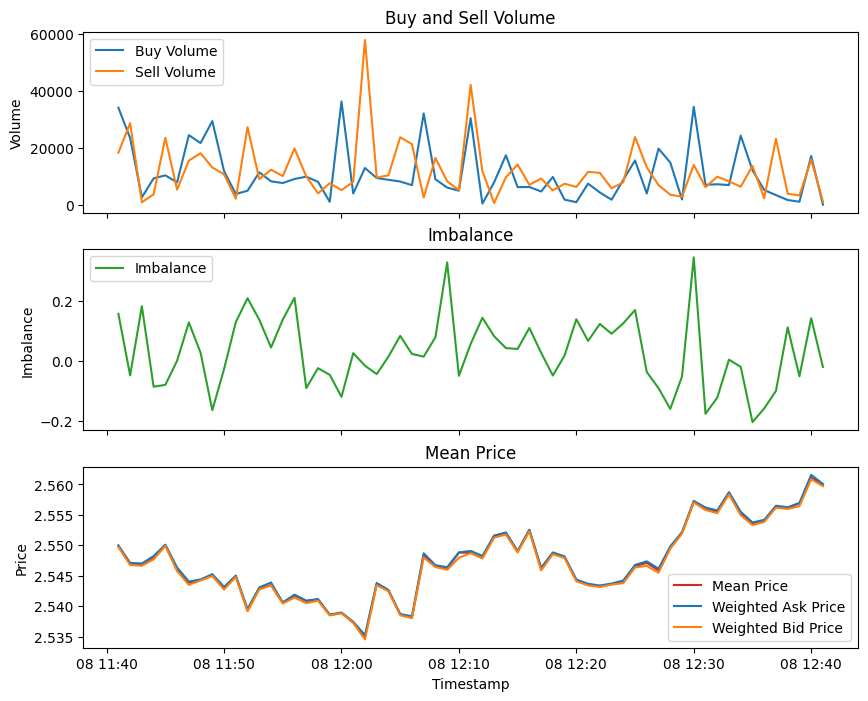

In [160]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))

# Plot df_match_agg data on the first subplot
ax1.plot(df_match_agg['timestamp'], df_match_agg['buy_volume'], label='Buy Volume', color='tab:blue')
ax1.plot(df_match_agg['timestamp'], df_match_agg['sell_volume'], label='Sell Volume', color='tab:orange')
ax1.set_ylabel('Volume')
ax1.legend(loc='upper left')
ax1.set_title('Buy and Sell Volume')

# Plot df_deep5_interval data on the second subplot
ax2.plot(df_deep5_interval['timestamp'], df_deep5_interval['imbalance'], label='Imbalance', color='tab:green')
ax2.set_ylabel('Imbalance')
ax2.legend(loc='upper left')
ax2.set_title('Imbalance')

# Plot mean price on the third subplot
ax3.plot(df_deep5_interval['timestamp'], df_deep5_interval['mean_price'], label='Mean Price', color='tab:red')
ax3.plot(df_deep5_interval['timestamp'], df_deep5_interval['weighted_avg_ask_price'], label='Weighted Ask Price', color='tab:blue')
ax3.plot(df_deep5_interval['timestamp'], df_deep5_interval['weighted_avg_bid_price'], label='Weighted Bid Price', color='tab:orange')
ax3.set_xlabel('Timestamp')
ax3.set_ylabel('Price')
ax3.legend(loc='lower right')
ax3.set_title('Mean Price')

plt.show()

In [161]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with shared x-axis
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.1, 
                    subplot_titles=('Candlestick Chart', 'Volume', 'Imbalance'))

# Add candlestick chart to the first subplot
fig.add_trace(go.Candlestick(
    x=candlestick_df.index,
    open=candlestick_df['mean_open'],
    high=candlestick_df['mean_high'],
    low=candlestick_df['mean_low'],
    close=candlestick_df['mean_close'],
    name='Candlestick'
), row=1, col=1)

# Add buy_volume line to the second subplot
fig.add_trace(go.Scatter(
    x=df_match_agg['timestamp'],
    y=df_match_agg['buy_volume'],
    mode='lines',
    name='Buy Volume',
    line=dict(color='green')
), row=2, col=1)

# Add sell_volume line to the second subplot
fig.add_trace(go.Scatter(
    x=df_match_agg['timestamp'],
    y=df_match_agg['sell_volume'],
    mode='lines',
    name='Sell Volume',
    line=dict(color='red')
), row=2, col=1)

# Add imbalance line to the third subplot
fig.add_trace(go.Scatter(
    x=df_deep5_interval['timestamp'],
    y=df_final['total_imbalance'],
    mode='lines',
    name='Imbalance'
), row=3, col=1)
# Update layout for better visualization
fig.update_layout(
    title='Candlestick Chart with Volume',
    xaxis_title='Timestamp',
    yaxis_title='Mean Price',
    xaxis2_title='Timestamp',
    yaxis2_title='Volume',
    xaxis_rangeslider_visible=False,
    hovermode='x unified',  # Enable cursor lines indicating x and y axis
    width=800,  # Set the width of the chart
    height=800   # Set the height of the chart
)


# Display the chart
fig.show()

In [162]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with shared x-axis
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.1, 
                    subplot_titles=('Candlestick Chart', 'Volume', 'Imbalance', 'Prices'))

# Add candlestick chart to the first subplot
fig.add_trace(go.Candlestick(
    x=candlestick_df.index,
    open=candlestick_df['mean_open'],
    high=candlestick_df['mean_high'],
    low=candlestick_df['mean_low'],
    close=candlestick_df['mean_close'],
    name='Candlestick'
), row=1, col=1)

# Add buy_volume line to the second subplot
fig.add_trace(go.Scatter(
    x=df_match_agg['timestamp'],
    y=df_match_agg['buy_volume'],
    mode='lines',
    name='Buy Volume',
    line=dict(color='green')
), row=2, col=1)

# Add sell_volume line to the second subplot
fig.add_trace(go.Scatter(
    x=df_match_agg['timestamp'],
    y=df_match_agg['sell_volume'],
    mode='lines',
    name='Sell Volume',
    line=dict(color='red')
), row=2, col=1)

# Add average match sell price, average match buy price, weighted bid price, and weighted ask price to the fourth subplot
fig.add_trace(go.Scatter(
    x=df_deep5_interval['timestamp'],
    y=df_match_agg['avg_match_sell_price'],
    mode='lines',
    name='Avg Match Sell Price',
    line=dict(color='blue')
), row=3, col=1)

fig.add_trace(go.Scatter(
    x=df_deep5_interval['timestamp'],
    y=df_match_agg['avg_match_buy_price'],
    mode='lines',
    name='Avg Match Buy Price',
    line=dict(color='orange')
), row=3, col=1)

fig.add_trace(go.Scatter(
    x=df_deep5_interval['timestamp'],
    y=df_deep5_interval['weighted_avg_bid_price'],
    mode='lines',
    name='Weighted Bid Price',
    line=dict(color='purple')
), row=3, col=1)

fig.add_trace(go.Scatter(
    x=df_deep5_interval['timestamp'],
    y=df_deep5_interval['weighted_avg_ask_price'],
    mode='lines',
    name='Weighted Ask Price',
    line=dict(color='brown')
), row=3, col=1)

# Add imbalance line to the third subplot
fig.add_trace(go.Scatter(
    x=df_deep5_interval['timestamp'],
    y=df_deep5_interval['imbalance'],
    mode='lines',
    name='Imbalance'
), row=4, col=1)


# Update layout for better visualization
fig.update_layout(
    title='Candlestick Chart with Volume',
    xaxis_title='Timestamp',
    yaxis_title='Mean Price',
    xaxis2_title='Timestamp',
    yaxis2_title='Volume',
    xaxis3_title='Timestamp',
    yaxis3_title='Imbalance',
    xaxis4_title='Timestamp',
    yaxis4_title='Price',
    xaxis_rangeslider_visible=False,
    hovermode='x unified',  # Enable cursor lines indicating x and y axis
    width=800,  # Set the width of the chart
    height=1000   # Set the height of the chart
)

# Display the chart
fig.show()